<a href="https://www.kaggle.com/code/tusharaggarwal27/kmeans-on-mall-customers-data?scriptVersionId=116223979" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#F5DEB3;
           font-size:170%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">
<p style="padding: 10px;
          text-align: center;
          font-size:150%;
          color:blue;">
           🛍️🤖👍Kmeans on Mall Customers data🛍️🤖👍
            
</p>
<style>
        h1{text-align: center;}
</style>  
    
</div>


<p style="font-family:cursive; font-size:18px; color:'darkcyan';">I brewed this notebook from scratch, If this notebook helped, please consider upvoting and cite me if sharing ,Thank you!</p>

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:18px;border-radius:20px">
    <a href="https://www.linkedin.com/in/tusharaggarwalinseec/" target="_blank">Lets connect on LinkedIn!</a>
    
   </p>
<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:18px;border-radius:20px">
<a href="https://github.com/tushar2704" target="_blank">Follow me on Github too!</a> </p>
<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:18px;border-radius:20px">
    <a href="https://medium.com/@tushar_aggarwal" target="_blank">Also checkout my Medium posts!</a>
    
   </p>

<div class="alert alert-info" role="alert" style="font-size:17px;border-radius:20px">
    <b>In this project, I am using Kmeans algorithm on Mall Customers data to uncover customer segmenation,</b>
    
</div>
<div class="alert alert-info" role="alert" style="font-size:15px;border-radius:20px">
    <b>Some things to note:</b>
    <br><br>K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data.
    <br><br>
    In k means clustering, we have to specify the number of clusters we want the data to be grouped into.The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster.
    <br><br>
    Then, the algorithm iterates through two steps: Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster.
These two steps are repeated till the within cluster variation cannot be reduced any further.
The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.
</div>

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Importing the required Libraries
    
   </p>

In [1]:
# Data manipulation imports
import numpy as np
import pandas as pd

# Visualization imports
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
from sklearn.datasets import make_blobs

# Modeling imports
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Loading the Mall Customers Data
    
   </p>

In [2]:
market_data = pd.read_csv("/kaggle/input/mall-customers/Mall_Customers.csv")

# Previewing the DataFrame
market_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Creating some data(Example for Means first, then for Mall Customers Data)
    <br><br>
    make_blobs can be used to generate data based on normal distribution
   </p>

In [3]:
#creating the data for example
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=123)
data

(array([[ 2.82968803e+00, -2.73812431e+00],
        [ 3.32636434e+00, -2.42120727e+00],
        [ 5.25664715e+00, -1.59389565e+00],
        [-6.07724202e+00,  6.33992110e-01],
        [ 7.74299078e+00,  6.79085720e+00],
        [ 8.89273800e+00,  4.90887907e+00],
        [ 3.01904976e+00, -1.53130952e+00],
        [ 2.01229475e+00, -2.74318428e+00],
        [-4.69590698e+00, -1.86344216e+00],
        [ 4.97001752e+00, -2.31937053e+00],
        [ 6.02135100e+00, -6.25217878e+00],
        [ 5.53407627e+00, -1.02558534e+00],
        [ 9.09057189e+00,  4.13827770e+00],
        [ 2.45479953e+00, -3.34900437e-01],
        [ 8.34746810e+00,  5.04769262e+00],
        [ 8.73153386e+00,  1.34009721e+00],
        [ 1.23766465e+01,  2.74274939e+00],
        [ 1.99703750e+00, -1.03741012e+00],
        [ 5.43255430e+00, -4.94429195e-01],
        [ 5.73668073e+00, -3.58207778e+00],
        [-4.90967934e+00, -7.39102309e-02],
        [ 9.03233636e+00,  3.35766043e+00],
        [ 1.02937402e+01,  1.682

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Visualizing the data
    
   </p>

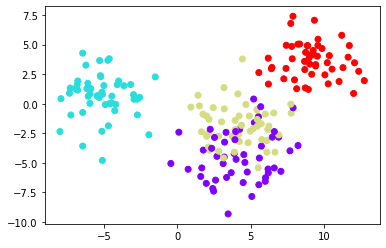

In [4]:
plt.scatter(data[0][:,0],data[0][:,1], c=data[1], cmap='rainbow')
plt.show()

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Creating the Clusters
    
   </p>

In [5]:
km = KMeans(n_clusters=4)

In [6]:
#fitting the model
km.fit(data[0])

KMeans(n_clusters=4)

In [7]:
#checking for centres
km.cluster_centers_

array([[ 3.84423301, -5.43697023],
       [-5.15404954,  0.67573735],
       [ 9.06632404,  3.64305952],
       [ 4.49007517, -1.69456433]])

In [8]:
#checking for labels
km.labels_

array([3, 3, 3, 1, 2, 2, 3, 3, 1, 3, 0, 3, 2, 3, 2, 2, 2, 3, 3, 3, 1, 2,
       2, 3, 1, 0, 2, 0, 0, 2, 3, 3, 3, 1, 0, 2, 2, 1, 1, 1, 2, 3, 2, 2,
       2, 1, 2, 3, 0, 2, 2, 0, 3, 3, 2, 0, 2, 2, 2, 2, 0, 0, 1, 3, 2, 1,
       2, 3, 0, 3, 3, 1, 2, 3, 1, 3, 0, 2, 2, 2, 1, 3, 0, 0, 3, 1, 0, 2,
       0, 1, 2, 3, 0, 2, 1, 3, 2, 1, 1, 1, 3, 3, 2, 0, 3, 3, 1, 1, 0, 3,
       3, 3, 0, 0, 2, 3, 1, 1, 3, 1, 0, 1, 3, 1, 2, 0, 0, 0, 0, 0, 0, 3,
       0, 3, 1, 2, 1, 3, 3, 3, 1, 2, 3, 1, 3, 3, 1, 0, 0, 1, 2, 2, 3, 3,
       0, 3, 0, 1, 0, 1, 1, 1, 1, 2, 3, 1, 1, 1, 0, 1, 2, 3, 3, 2, 2, 2,
       1, 3, 0, 1, 2, 3, 0, 1, 2, 3, 1, 2, 1, 0, 2, 3, 1, 0, 3, 2, 1, 3,
       3, 1], dtype=int32)

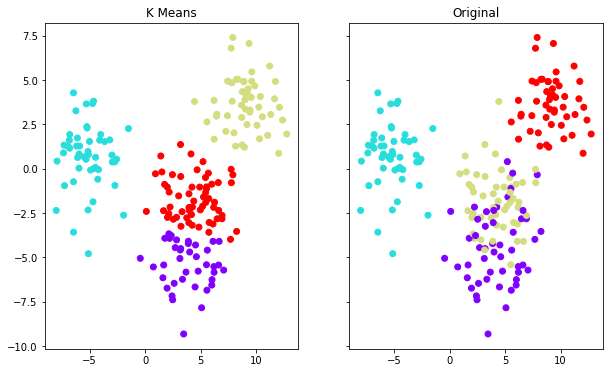

In [9]:
#Compare original data points with cluster data points visually
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=km.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Spotted the difference, now for market data
    
   </p>

================================================================================

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Now, Clustering using a different data set - Mall_Customers
    
   </p>

In [10]:
#Previewing top11 from Market data
market_data.head(11)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [11]:
#checking basic metadata
market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Now, defining variables X and y
    
   </p>

In [12]:
X = market_data.iloc[:,[3,4]].values # Using only columns Annual Income (k$) & Spending Score (1-100) as dependent variable

In [13]:
#Checking X variable
print(X), type(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

(None, numpy.ndarray)

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Now, Using the elbow method (wcss) to find the optimal number of clusters
    
   </p>

In [14]:
# defining for loop for wcss
wcss = [] # within custer sum of squares

for i in range(1,11):
    km=KMeans(n_clusters=i, init='k-means++', random_state=123)
    km.fit(X)
    wcss.append(km.inertia_)

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Plotting and checking the wcss
    
   </p>

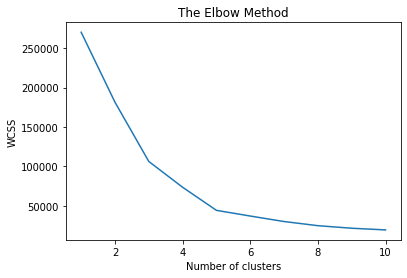

In [15]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()   

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Now, choosing n_clusters=5 as per wcss
    
   </p>

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Now, Training the K-Means model on the Market data
    
   </p>

In [16]:
km = KMeans(n_clusters = 5, init = 'k-means++', random_state = 123)
y_km = km.fit_predict(X)
print(y_km)
#K-means++ is a smart centroid initialization method for the K-mean algorithm. The goal is to spread out the initial centroid by assigning the first centroid randomly then selecting the rest of the centroids based on the maximum squared distance. The idea is to push the centroids as far as possible from one another

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Now, Visualising the clusters
    
   </p>

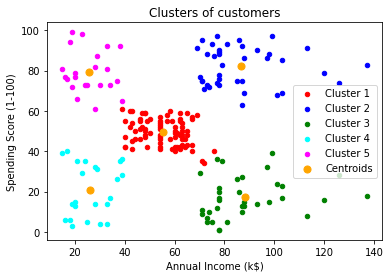

In [17]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_km == 3, 0], X[y_km == 3, 1], s = 20, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_km == 4, 0], X[y_km == 4, 1], s = 20, c = 'magenta', label = 'Cluster 5')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 50, c = 'orange', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px">Now, the 5 clusters can be seen and as per business requirement, segments can be targeted. Note, this notebook is just to show clear example for K-Means!    
   </p>

<p style="font-family:cursive; font-size:18px; color:'darkcyan';">I brewed this notebook from scratch, If this notebook helped, please consider upvoting and cite me if sharing ,Thank you!</p>
​
<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:18px;border-radius:20px">
    <a href="https://www.linkedin.com/in/tusharaggarwalinseec/" target="_blank">Lets connect on LinkedIn!</a>
    
   </p>
<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:18px;border-radius:20px">
<a href="https://github.com/tushar2704" target="_blank">Follow me on Github too!</a> </p>
<p style="width: 700px;padding: 20px;background: papayawhip;border-radius:10px;font-size:18px;border-radius:20px">
    <a href="https://medium.com/@tushar_aggarwal" target="_blank">Also checkout my Medium posts!</a>
    
   </p>